<a href="https://colab.research.google.com/github/FabioVCoelho/Univali/blob/master/ProcessamentoDeImagem/Convolu%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolução genérica

Operação de convolução é:
- A soma dos resultados da multiplicação de cada elemento da
matriz com a região da imagem sob a mesma;
- A subseqüente substituição do valor do pixel sobre o qual a matriz
foi aplicada por este resultado

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def print_img(img):
  #Display the image
  cv2_imshow(img)
  #key binding function
  cv2.waitKey(0)
  #Destroyed all window we created earlier.
  cv2.destroyAllWindows()

def gray_tone(array):
  return (array[0] * 0.299 + array[1] * 0.587 + array[2] * 0.114)

def image_cinza(imagem):
  new_img = imagem
  for index_img,img_array in enumerate(imagem):
    for index_pixel,pixel in enumerate(img_array):
      new_img[index_img][index_pixel] = gray_tone(pixel)
  return new_img

In [ ]:
imagem = image_cinza(cv2.imread('/content/megaman.png'))

In [ ]:
kernel = [[-1/11,-1/11,-1/11],[-1/11,8/11,-1/11],[-1/11,-1/11,-1/11]]

In [ ]:
blank_image = np.zeros((len(image),len(image[0]),3), np.uint8)

In [ ]:
print(imagem[0][0]*kernel[0])
print(imagem[0][1]*kernel[1])
print(imagem[0][2]*kernel[2])


print(len(imagem[0]))
print(len(imagem))

[-9.63636364 -9.63636364 -9.63636364]
[-9.63636364 77.09090909 -9.63636364]
[-9.72727273 -9.72727273 -9.72727273]
512
512


In [ ]:
for index_img in range(0,len(imagem)):
  for index_pixel in range(0,len(imagem[0]) - len(kernel), len(kernel)):
    sum = 0
    for kernel_array in range(0,len(kernel)):
      for kernel_pixel in range(0,len(kernel[0])):
        sum += imagem[index_img][index_pixel + kernel_array][kernel_pixel] * kernel[kernel_array][kernel_pixel]
    blank_image[index_img][index_pixel + len(kernel)//2] = sum



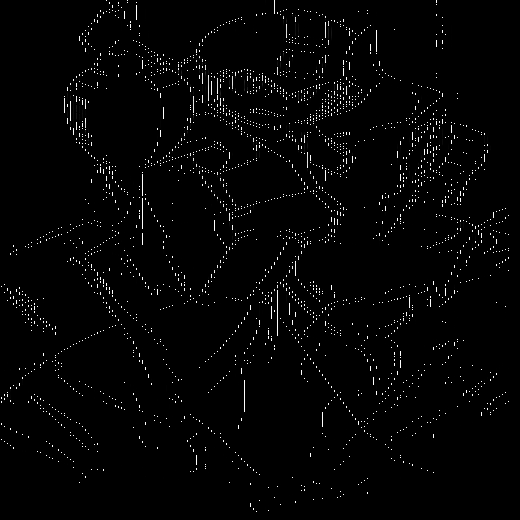

In [ ]:
print_img(blank_image)

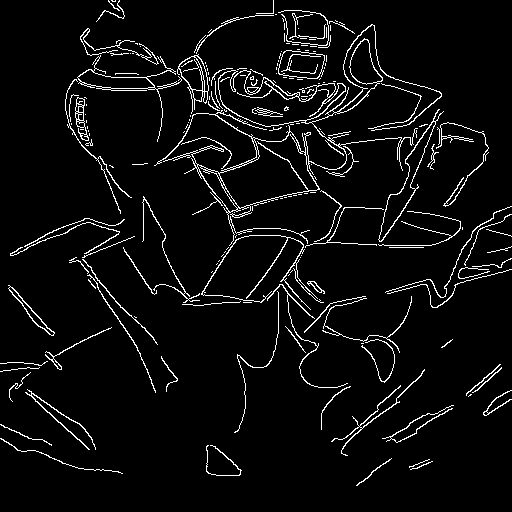

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('megaman.png',0)
edges = cv2.Canny(img,100,200)

print_img(edges)

Adição

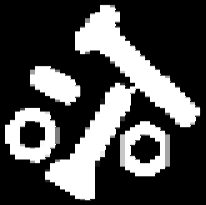

In [ ]:
imagem = image_cinza(cv2.imread('/content/Capturar_slide.PNG'))
blank_image = np.zeros((len(imagem),len(imagem[0]),3), np.uint8)
kernel = np.ones((5,5), np.uint8)
for index_img in range(0,len(imagem)):
  for index_pixel in range(0,len(imagem[0]) - len(kernel), len(kernel)):
    array_ponto_central = imagem[index_img][index_pixel + len(kernel)//2]
    if array_ponto_central[0] > 0:                             # Se o ponto central da imagem for > 0
      for kernel_array in range(0,len(kernel)):                # Para cada array do kernel
        for kernel_pixel in range(0,len(kernel[0])):           # Para cada valor do array do kernel
          if (kernel[kernel_array][kernel_pixel] > 0):         # Se for maior que zero
            # Insira na nova imagem o valor do ponto central da imagem.
            blank_image[index_img][index_pixel + kernel_array] = array_ponto_central
          else:
            # Senão coloca zero (preto)
            blank_image[index_img][index_pixel + kernel_array] = 0
    else:
      blank_image[index_img][index_pixel] = imagem[index_img][index_pixel]
print_img(blank_image)

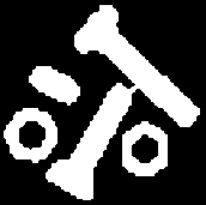

In [ ]:
img = cv2.imread('/content/Capturar_slide.PNG')
print_img(img)

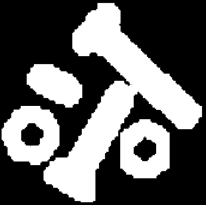

In [ ]:
img = image_cinza(cv2.imread('/content/Capturar_slide.PNG'))
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(img, kernel, iterations=1)
print_img(img_dilation)